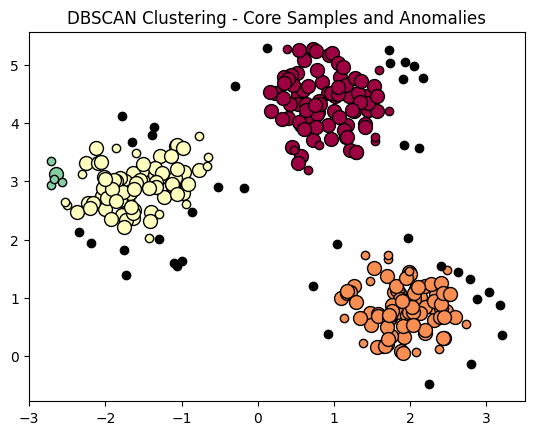

In [1]:
# Question 4: Introduction to DBSCAN Clustering for Anomaly Detection
# Description: Apply DBSCAN on a dataset to identify core samples and anomalies.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=0)

db = DBSCAN(eps=0.3, min_samples=5).fit(X)
labels = db.labels_

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title("DBSCAN Clustering - Core Samples and Anomalies")
plt.show()
